In [2]:
import seaborn as sb
import numpy as np
import pandas as pd

In [3]:
np.random.seed(1)
def plane_seats(n:int)->pd.DataFrame:
    """
    Create DataFrame simulating blueprint of seating plan:
        index: ID of passenger
        Seat_assigned: ID of seat which was on passenger's pass
        Seat_taken: ID of seat the passenger really sits on -filled in seat_taken function
    
    Args:
        n (int): number of passengers
    
    Returns:
        df (DataFrame): Blueprint of seating plan
        """
    df=pd.DataFrame({"ID_passenger":range(1,n+1),"Seat_assigned":np.random.permutation(np.arange(1,n+1)),"Seat_taken":[np.nan]*n})
    df.set_index("ID_passenger",inplace=True)
    df.loc[1,"Seat_assigned"]=np.nan # first passenger lost his pass
    return df

def seat_taken(n:int,df:pd.DataFrame)->pd.DataFrame:
    """
    Filling Seat_taken column and info whether last passanger sits on his assigned seat

    Args: 
    n  (int): number of passengers
    df (pd.DataFrame): seating plan

    Returns:
    success (bool): Last passenger sits on his assigned seat
    df (DataFrame): Updated seating plan
    """
    free_seats=list(range(1,n+1))

    for ID_pass in df.index:
        seat_ass=df.loc[ID_pass,"Seat_assigned"]
        if pd.isna(seat_ass) or seat_ass in df["Seat_taken"].values:
            subs_seat=free_seats.pop(np.random.randint(0,len(free_seats)))
            df.loc[ID_pass,"Seat_taken"]=subs_seat

        else:
            df.loc[ID_pass,"Seat_taken"]=seat_ass
            free_seats.remove(seat_ass)
    success=df.loc[n,"Seat_assigned"]==df.loc[n,"Seat_taken"]
    return success,df

def simulation(n_runs,n_pass):
    """
    Simulating boarding the plane n_runs times and calculating probabilty of 'success'

    Args:
    n_runs (int): number of simulations
    n_pass (int): number of passengers

    Returns:
    float: estimated probabilty, that last passenger sits on his assigned seat
    """   
    temp=0
    for i in range(n_runs):
        df=plane_seats(n_pass)
        succ,df=seat_taken(n_pass,df) #generating data
        temp+=succ
    return temp/n_runs #estimated proportion for given sample
    

c:\Users\Standa\Desktop\python\statistika\.stat\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Standa\Desktop\python\statistika\.stat\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


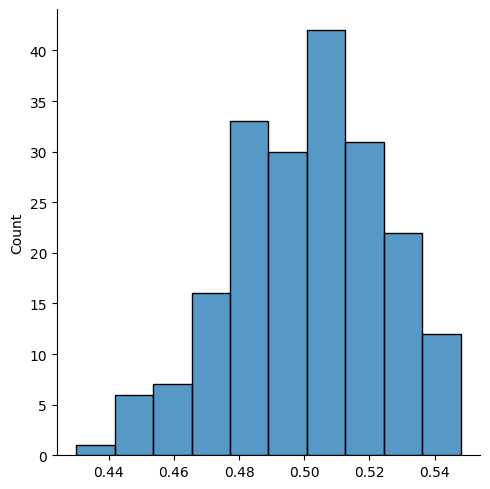

In [5]:
#generating 200 sample with size 500; partial estimated propotions of success are used to create sample distribution of estimated proportion
part_est=[]
for sample in range(200):
    part_est.append(simulation(500,100))
sb.displot(part_est)

In [12]:
#proportion estimate and 95% confidence interval
proportion_estimate=np.mean(part_est)
low=np.percentile(part_est,2.5)
high=np.percentile(part_est,97.5)
SE=np.std(part_est)

print(f"Proportion estimate: {proportion_estimate}; Confidence interval: ({low},{high}); Standard Error: {SE}")

Proportion estimate: 0.5012300000000001; Confidence interval: (0.45,0.54205); Standard Error: 0.023580226886101


Proportion estimate is almost equal to theoretical value of 0.5; CI includes this value 